In [ ]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# orders_qu.csv
url = "https://drive.google.com/file/d/143CzG5DriVSPMkaL1UP4k3Y80oS8fgbV/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [ ]:
orders_qu = orders_qu.copy()
orderlines_qu = orderlines_qu.copy()
product_category_df = products_cl.copy()
brands = brands.copy()

In [ ]:
products_cl

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364
...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392


In [ ]:
product_category_df = products_cl.copy()

In [ ]:
product_category_df.head()

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364


# 1.  Category creation by search term

In [ ]:
product_category_df["category"] = ""
product_category_df.head()

,sku,name,desc,price,in_stock,type,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,


Find all the products with certain words in their description using .loc[] and .str.contains()

In [ ]:
product_category_df.loc[product_category_df["desc"].str.contains("keyboard", case=False)]

,sku,name,desc,price,in_stock,type,category
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,
15,MOS0021,Clearguard Moshi MacBook Pro and Air,Keyboard Protector MacBook Pro 13-inch Retina ...,24.95,0,13835403,
24,APP0277,Apple Wireless Keyboard Keyboard (OEM) Mac,Ultrathin keyboard Apple Bluetooth Spanish (un...,79.00,0,13855401,
64,HGD0012,Henge Docks Click keyboard support iMac,Base to hold the Apple Magic TrackPad and Wire...,29.00,0,8696,
365,LOG0084,Logitech Ultrathin Keyboard Cover Keyboard Cov...,Ultrathin cover and cover with Bluetooth keybo...,89.99,0,12575403,
...,...,...,...,...,...,...,...
9720,PAC2508,Replacement Magic Wireless Keyboard by Matias ...,Keyboard replacement service at the time of pu...,119.99,1,13855401,
9751,MTF0008,Mistify Clean Screens Natural 500ml.,Spray cleaning screens and keyboards.,14.99,1,12085400,
9796,ZAG0026-A,Open - Zagg Rugged Keyboard Folio iPad Messeng...,Case reconditioned keyboard and adjustable pos...,99.99,0,12575403,
9932,APP1472,Apple Magic Keyboard English International,English keyboard Mac and Apple iPad Ultrathin ...,119.00,1,13855401,


Change the value in the category column to keyboard for all of these keyboard products.



In [ ]:
product_category_df.loc[product_category_df["desc"].str.contains("keyboard", case=False), "category"] = "keyboard"

# 2.  Category creation using regex

Use a product's name to select products for our categories.

In [ ]:
product_category_df.loc[product_category_df["name"].str.contains("apple iphone", case=False)]

,sku,name,desc,price,in_stock,type,category
35,APP0308,AV Cable Adapter Apple iPhone iPad and iPod white,IPhone iPad iPod adapter and AV cable.,45.00,0,1230,
214,REP0100,Color change to White Apple iPhone 4,It is including parts and labor..,94.21,0,"1,44E+11",
215,REP0052,Color change to White Apple iPhone 4,It is including parts and labor..,94.21,0,"1,44E+11",
579,APP0675,Apple iPhone 5S 32GB Space Gray,New Free iPhone 5S 32GB (ME435Y / A).,559.00,0,NaN,
956,APP0823,Apple iPhone 6 16GB Silver,New iPhone 6 16GB Free (MG482QL / A).,639.00,0,NaN,
...,...,...,...,...,...,...,...
9790,AP20455,Like new - Apple iPhone 8 256GB Gold,Apple iPhone 8 reconditioned 256GB in Gold rea...,979.00,0,113291716,
9794,APP2482-A,Open - Apple iPhone 8 Plus 256GB Gold,Refurbished Apple iPhone 8 Plus 256GB Free Gold,1089.00,0,113281716,
9929,APP2477-A,Open - Apple iPhone 8 Plus 64GB Space Gray,Apple iPhone 8 Plus 64GB Space Gray,919.00,0,113281716,
9958,AP20467,Like new - Apple iPhone Silicone Case Cover 7 ...,Reconditioned silicone sleeve microfiber Apple...,45.00,0,11865403,


A lot of accessories are included in this search. Refine this using a little regex. Here, we will add .{0,7} at the beginning of the search: this means **I** will find all apple iphones that have 7 or less characters preceding the term "apple iphone

In [ ]:
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple iphone", case=False)]

,sku,name,desc,price,in_stock,type,category
579,APP0675,Apple iPhone 5S 32GB Space Gray,New Free iPhone 5S 32GB (ME435Y / A).,559.0,0,NaN,
956,APP0823,Apple iPhone 6 16GB Silver,New iPhone 6 16GB Free (MG482QL / A).,639.0,0,NaN,
961,APP0829,Apple iPhone 6 Plus 16GB Silver,New iPhone 6 Plus 16G Free (MGA92QL / A).,749.0,0,NaN,
962,APP0822,Apple iPhone 6 16GB Space Gray,New iPhone 6 16GB Free (MG472QL / A).,639.0,0,NaN,
963,APP0825,Apple iPhone 6 64GB Space Gray,New iPhone 6 64GB Free (MG4F2QL / A).,749.0,0,NaN,
...,...,...,...,...,...,...,...
9585,APP1634-A,Open - Apple iPhone 7 Plus 32GB Black,New 32GB Apple iPhone 7 Plus Free Black,779.0,0,85651716,
9587,APP2540-A,Open - Apple iPhone Leather Folio X Baya,Leather case with box and official cover Apple,109.0,0,11865403,
9714,APP2562-A,Open - Apple iPhone Leather Case Cover Red,Reconditioned skin sheath official Apple desig...,45.0,0,11865403,
9794,APP2482-A,Open - Apple iPhone 8 Plus 256GB Gold,Refurbished Apple iPhone 8 Plus 256GB Free Gold,1089.0,0,113281716,


Creating a category column "smartphone"

In [ ]:
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple iphone", case=False), "category"] = "smartphone"

In [ ]:
product_category_df["category"].value_counts()

,count
category,
,9634
smartphone,269
keyboard,89


# 3. One product with multiple categories

A product may fit into multiple categories. To  create multiple categories for one product, I will use the python addition assignment +=.

In [ ]:
product_category_df.loc[product_category_df["desc"].str.contains("keyboard", case=False), "category"] += ", keyboard"
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple iphone", case=False), "category"] += ", smartphone"
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple ipod", case=False), "category"] += ", ipod"
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple ipad|tablet", case=False), "category"] += ", tablet"
product_category_df.loc[product_category_df["name"].str.contains("imac|mac mini|mac pro", case=False), "category"] += ", desktop"

# 4. Using type to create categories

In [ ]:
category_type_df = products_cl.copy()

In [ ]:
number_of_type=50

In [ ]:
print(f"With the {number_of_type} largest types, we account for {((product_category_df.groupby('type').count().nlargest(number_of_type, 'sku')['sku'].sum()) / (product_category_df.shape[0]) * 100).round(2)}% of all products.")

With the 50 largest types, we account for 89.09% of all products.


In [ ]:
category_type_df.loc[category_type_df["type"] == "11865403", "category"] = "Phone Cases"
category_type_df.loc[category_type_df["type"] == "12175397", "category"] = "External Hard Drives"
category_type_df.loc[category_type_df["type"] == "1298", "category"] = "Open/ Second Hand - Misc"
category_type_df.loc[category_type_df["type"] == "11935397", "category"] = "Internal Hard Drives"
category_type_df.loc[category_type_df["type"] == "11905404", "category"] = "Accessories/ Add Ons"
category_type_df.loc[category_type_df["type"] == "1282", "category"] = "Laptops"
category_type_df.loc[category_type_df["type"] == "12635403", "category"] = "Tablet Cases"
category_type_df.loc[category_type_df["type"] == "13835403", "category"] = "Laptop Cases"
category_type_df.loc[category_type_df["type"] == "5,74E+15", "category"] = "Computers"
category_type_df.loc[category_type_df["type"] == "1364", "category"] = "Computer Memory"
category_type_df.loc[category_type_df["type"] == "1296", "category"] = "Monitor"
category_type_df.loc[category_type_df["type"] == "1325", "category"] = "Adaptors/ Cables"
category_type_df.loc[category_type_df["type"] == "12585395", "category"] = "Adaptors/ Cables"
category_type_df.loc[category_type_df["type"] == "5384", "category"] = "Headphones"
category_type_df.loc[category_type_df["type"] == "1433", "category"] = "Internal Data Storage"
category_type_df.loc[category_type_df["type"] == "12215397", "category"] = "Internal Data Storage"
category_type_df.loc[category_type_df["type"] == "5398", "category"] = "Speakers"
category_type_df.loc[category_type_df["type"] == "1,02E+12", "category"] = "Laptops"
category_type_df.loc[category_type_df["type"] == "1,44E+11", "category"] = "Repair Kits/ Parts"
category_type_df.loc[category_type_df["type"] == "57445397", "category"] = "Memory Cards/ USB Flash drives"
category_type_df.loc[category_type_df["type"] == "1334", "category"] = "Networking Devices"
category_type_df.loc[category_type_df["type"] == "2158", "category"] = "Laptops"
category_type_df.loc[category_type_df["type"] == "2449", "category"] = "Smart Watch Straps"
category_type_df.loc[category_type_df["type"] == "12655397", "category"] = "Internal Hard Drives"
category_type_df.loc[category_type_df["type"] == "1229", "category"] = "Smartpen/ Stylus"
category_type_df.loc[category_type_df["type"] == "12995397", "category"] = "External Hard Drives"
category_type_df.loc[category_type_df["type"] == "1515", "category"] = "Batteries/ Power Banks"
category_type_df.loc[category_type_df["type"] == "13615399", "category"] = "Chargers"
category_type_df.loc[category_type_df["type"] == "13555403", "category"] = "Phone Screen Protectors"
category_type_df.loc[category_type_df["type"] == "1405", "category"] = "Graphics Tablets"
category_type_df.loc[category_type_df["type"] == "1230", "category"] = "Adaptors/ Cables"
category_type_df.loc[category_type_df["type"] == "118692158", "category"] = "Computers"
category_type_df.loc[category_type_df["type"] == "1216", "category"] = "Stands/ Mounts"
category_type_df.loc[category_type_df["type"] == "24885185	", "category"] = "Smart Watch"
category_type_df.loc[category_type_df["type"] == "24895185", "category"] = "Smart Watch"
category_type_df.loc[category_type_df["type"] == "21485407", "category"] = "Repair Kits/ Parts"
category_type_df.loc[category_type_df["type"] == "1392", "category"] = "Backpacks"
category_type_df.loc[category_type_df["type"] == "11821715", "category"] = "iPods"
category_type_df.loc[category_type_df["type"] == "8696", "category"] = "Stands/ Mounts"
category_type_df.loc[category_type_df["type"] == "9094", "category"] = "Cameras"
category_type_df.loc[category_type_df["type"] == "5,39E+11", "category"] = "Laptops"
category_type_df.loc[category_type_df["type"] == "5,49E+11", "category"] = "Batteries/ Power Banks"
category_type_df.loc[category_type_df["type"] == "42945397", "category"] = "Memory Cards/ USB Flash drives"
category_type_df.loc[category_type_df["type"] == "12645406", "category"] = "Repair Kits/ Parts"
category_type_df.loc[category_type_df["type"] == "51601716	", "category"] = "Phones"
category_type_df.loc[category_type_df["type"] == "2,16E+11", "category"] = "Computers"
category_type_df.loc[category_type_df["type"] == "85651716", "category"] = "Phones"
category_type_df.loc[category_type_df["type"] == "24215399", "category"] = "Smart Watch Chargers"
category_type_df.loc[category_type_df["type"] == "5720", "category"] = "Stands/ Mounts"
category_type_df.loc[category_type_df["type"] == "14305406", "category"] = "Repair Kits/ Parts"

In [ ]:
category_type_df['category'] = category_type_df['category'].replace('nan', 'Others')

In [ ]:
category_type_df

,sku,name,desc,price,in_stock,type,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,Stands/ Mounts
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,others
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,others
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,Adaptors/ Cables
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,Computer Memory
...,...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282,others
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392,Backpacks
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392,Backpacks
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392,Backpacks


In [ ]:
category_type_df["category"].value_counts()

,count
category,
others,1200
Phone Cases,1057
External Hard Drives,1034
Open/ Second Hand - Misc,783
Internal Hard Drives,667
Laptops,657
Accessories/ Add Ons,454
Adaptors/ Cables,446
Tablet Cases,362


In [ ]:
category_type_df.to_csv('category_type_df.csv', index=False)

<ipython-input-33-e6a29e0fdad1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sum_price.index, y=category_sum_price.values, palette='viridis')


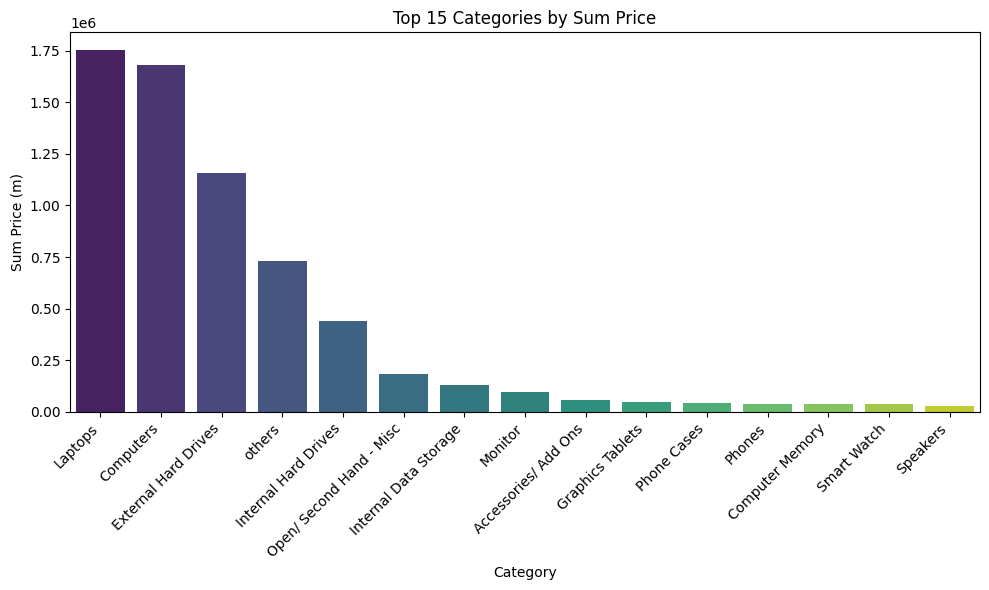

In [ ]:
# Group by category and calculate average price
category_sum_price = category_type_df.groupby('category')['price'].sum().sort_values(ascending=False).head(15)

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=category_sum_price.index, y=category_sum_price.values, palette='viridis')
plt.title('Top 15 Categories by Sum Price')
plt.xlabel('Category')
plt.ylabel('Sum Price (m)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Group by category and calculate sum of prices
category_sum_price = category_type_df.groupby('category').agg({'price': 'sum', 'in_stock': 'sum'}).sort_values(by='price', ascending=False).head(15)

# Display the result
print(category_sum_price)

                               price  in_stock
category                                      
Laptops                   1751208.25        17
Computers                 1681473.06        10
External Hard Drives      1159429.86       152
others                     729028.60       250
Internal Hard Drives       442716.42       147
Open/ Second Hand - Misc   184946.74         4
Internal Data Storage      131474.27        79
Monitor                     95870.89        35
Accessories/ Add Ons        57087.69       146
Graphics Tablets            49620.79        13
Phone Cases                 42074.73       274
Phones                      39802.63         2
Computer Memory             38878.73        89
Smart Watch                 36803.00         5
Speakers                    30340.75        45


In [ ]:
category_type_df['price_range']= ''

In [ ]:
# Define the bins and labels for price categories
bins = [0, 50, 100, float('inf')]
labels = ['low', 'middle', 'high']

# Create a new column 'price_range'
category_type_df['price_range'] = pd.cut(category_type_df['price'], bins=bins, labels=labels)

category_type_df

,sku,name,desc,price,in_stock,type,category,price_range
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,Stands/ Mounts,middle
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,others,middle
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,others,middle
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,Adaptors/ Cables,low
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,Computer Memory,low
...,...,...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282,others,low
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392,Backpacks,middle
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392,Backpacks,middle
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392,Backpacks,middle


<ipython-input-64-b21bf5eb8d01>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x='category', y='price_range', palette='viridis')


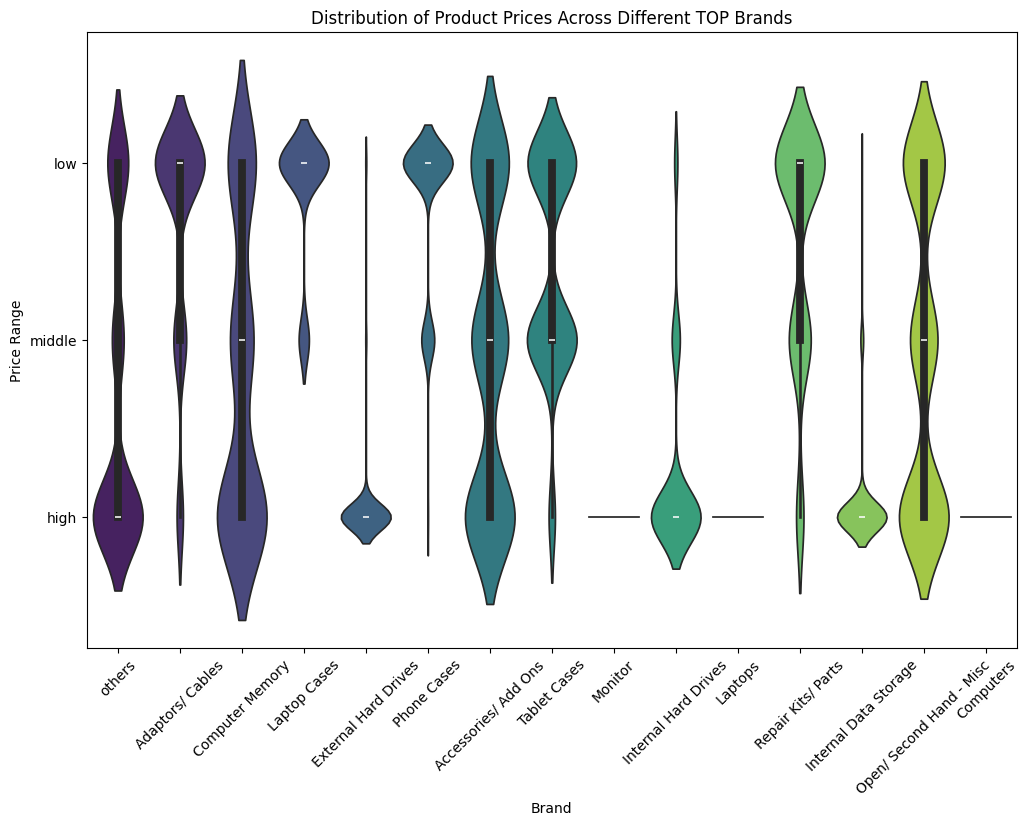

In [ ]:
# Identify the top 10 brands
top_10_brands = category_type_df['category'].value_counts().nlargest(15).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = category_type_df[category_type_df['category'].isin(top_10_brands)]

# Plotting the distribution of product prices across different categories using a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=filtered_df, x='category', y='price_range', palette='viridis')
plt.title('Distribution of Product Prices Across Different TOP Brands')
plt.xlabel('Brand')
plt.ylabel('Price Range')
plt.xticks(rotation=45)
plt.show()

#5.Distribution of Brand Prices

In [ ]:
# Extracting the first three letters of the 'sku' column
product_category_df['sku_short'] = product_category_df['sku'].str[:3]

# Merging the dataframes
merged_df_long = product_category_df.merge(brands, left_on='sku_short', right_on='short', how='left')

# Dropping the 'short' and 'sku_short' columns as they're no longer needed
merged_df_long = merged_df_long.drop(columns=['short', 'sku_short'])

merged_df_long

,sku,name,desc,price,in_stock,type,long
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,Rain Design
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,Apple
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,Apple
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,Apple
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,Kingston
...,...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282,Belkin
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392,Thule
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392,Thule
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392,Thule


In [ ]:
merged_df_long['price_range']= ''

In [ ]:
# Define the bins and labels for price categories
bins = [0, 50, 100, float('inf')]
labels = ['low', 'middle', 'high']

# Create a new column 'price_range'
merged_df_long['price_range'] = pd.cut(merged_df_long['price'], bins=bins, labels=labels)

merged_df_long

,sku,name,desc,price,in_stock,type,long,price_range
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,Rain Design,middle
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,Apple,middle
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,Apple,middle
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,Apple,low
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,Kingston,low
...,...,...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282,Belkin,low
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392,Thule,middle
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392,Thule,middle
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392,Thule,middle


<ipython-input-71-338e286abe95>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_prices.index, y=brand_prices.values, palette='viridis')


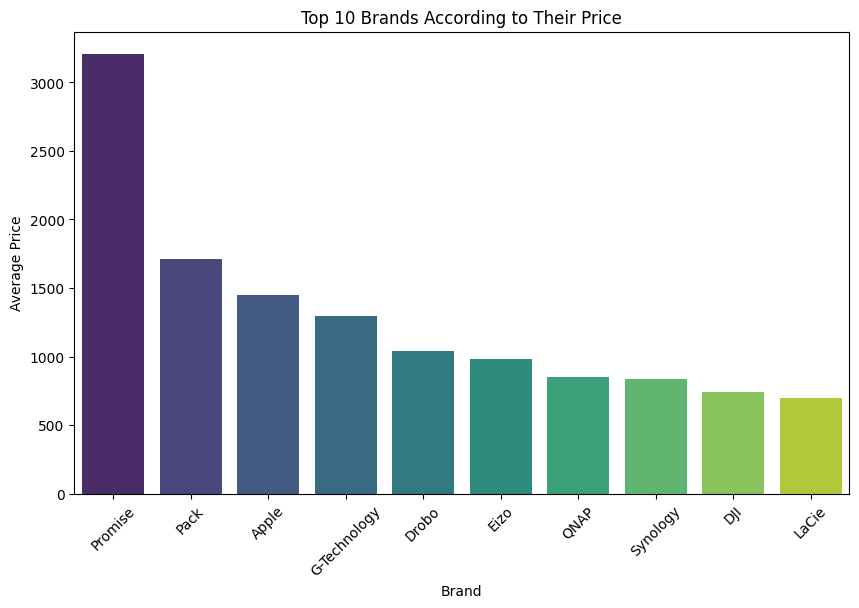

In [ ]:
# Grouping by 'long' and calculating the mean price
brand_prices = merged_df_long.groupby('long')['price'].mean().sort_values(ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_prices.index, y=brand_prices.values, palette='viridis')
plt.title('Top 10 Brands According to Their Price')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

<ipython-input-44-9522c3652440>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x='long', y='price_range', palette='viridis')


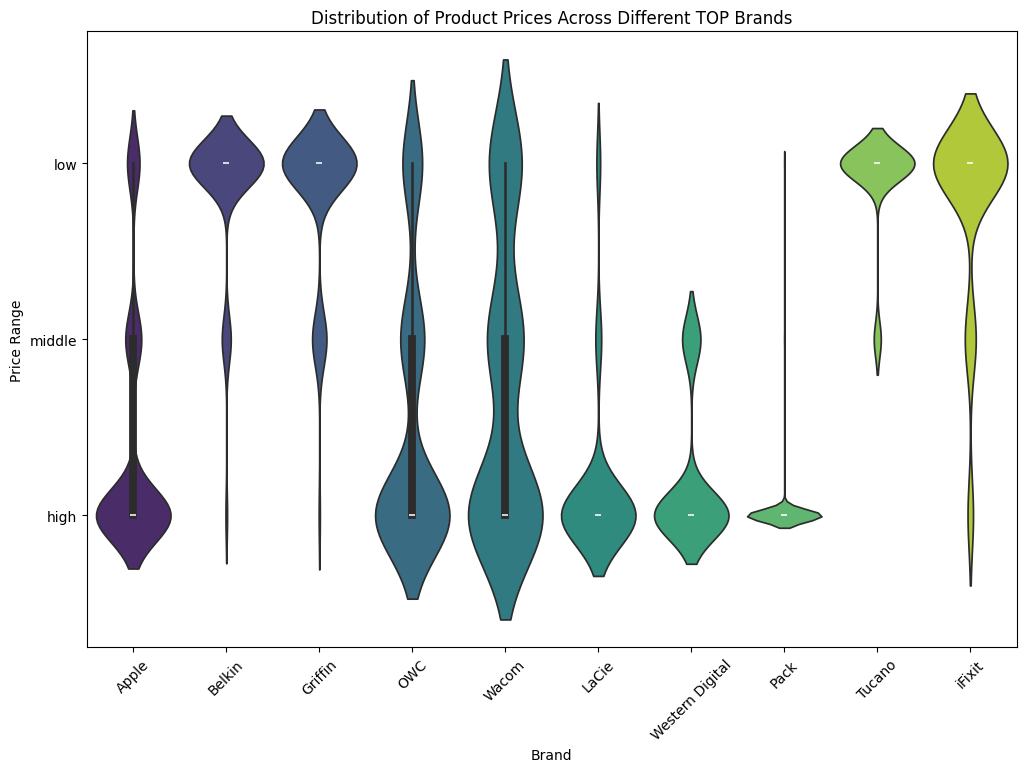

In [ ]:
# Identify the top 10 brands
top_10_brands = merged_df_long['long'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = merged_df_long[merged_df_long['long'].isin(top_10_brands)]

# Plotting the distribution of product prices across different categories using a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=filtered_df, x='long', y='price_range', palette='viridis')
plt.title('Distribution of Product Prices Across Different TOP Brands')
plt.xlabel('Brand')
plt.ylabel('Price Range')
plt.xticks(rotation=45)
plt.show()